In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import interpolate

from data_loader import DataLoader

In [3]:
data_loader = DataLoader()
data_train = data_loader.get_processed_data('datasets\\no1_train.csv')

In [4]:
data_train

,start_time,hydro,micro,thermal,wind,river,total,y,sys_reg,flow,...,cos_minute,sin_minute,day_of_week,cos_weekday,sin_weekday,day_of_year,cos_yearday,sin_yearday,date,daily_mean
0,2019-01-09 14:10:00,-0.214215,-0.542157,-0.105058,-0.154227,-1.0,-0.224725,-0.101918,0.287250,-0.641222,...,-0.836378,-0.548153,2,-0.5,0.87,9,0.988039,0.154204,2019-01-09,NaN
1,2019-01-09 14:15:00,-0.214215,-0.542157,-0.105058,-0.154227,-1.0,-0.224725,-0.110724,0.287250,-0.641222,...,-0.824178,-0.566331,2,-0.5,0.87,9,0.988039,0.154204,2019-01-09,NaN
2,2019-01-09 14:20:00,-0.214215,-0.542157,-0.105058,-0.154227,-1.0,-0.224725,-0.115621,0.287250,-0.641222,...,-0.811583,-0.584237,2,-0.5,0.87,9,0.988039,0.154204,2019-01-09,NaN
3,2019-01-09 14:25:00,-0.214215,-0.542157,-0.105058,-0.154227,-1.0,-0.224725,-0.137165,0.287250,-0.641222,...,-0.798599,-0.601864,2,-0.5,0.87,9,0.988039,0.154204,2019-01-09,NaN
4,2019-01-09 14:30:00,-0.214215,-0.542157,-0.105058,-0.154227,-1.0,-0.224725,-0.158632,0.287250,-0.641222,...,-0.785232,-0.619201,2,-0.5,0.87,9,0.988039,0.154204,2019-01-09,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225083,2021-03-01 03:05:00,0.089101,-0.170621,0.564202,0.209443,-1.0,0.132078,-0.258721,0.271889,0.049804,...,0.689479,0.724306,0,1.0,0.00,60,0.512978,0.858402,2021-03-01,-0.178341
225084,2021-03-01 03:10:00,0.089101,-0.170621,0.564202,0.209443,-1.0,0.132078,-0.268595,0.271889,0.049804,...,0.673458,0.739226,0,1.0,0.00,60,0.512978,0.858402,2021-03-01,-0.178341
225085,2021-03-01 03:15:00,0.089101,-0.170621,0.564202,0.209443,-1.0,0.132078,-0.295397,0.271889,0.049804,...,0.657114,0.753791,0,1.0,0.00,60,0.512978,0.858402,2021-03-01,-0.178341
225086,2021-03-01 03:20:00,0.089101,-0.170621,0.564202,0.209443,-1.0,0.132078,-0.289366,0.271889,0.049804,...,0.640455,0.767995,0,1.0,0.00,60,0.512978,0.858402,2021-03-01,-0.178341


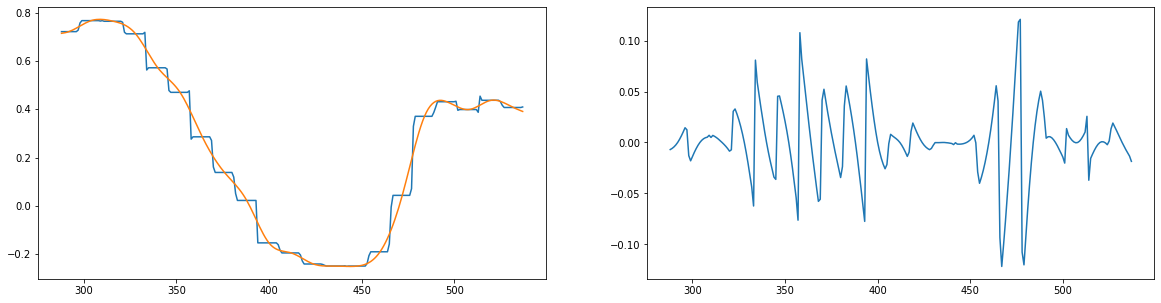

In [34]:
data_train
offset = 288
limit = 250
y_vals = data_train['total'] - data_train['flow']

minutes = np.array(pd.to_datetime(data_train['start_time'].iloc[:12]).dt.minute)
start_index = np.where(minutes==0)[0][0]
if start_index < 6:
    start_index += 6
else:
    start_index -= 6
spline_x_vals = np.arange(start_index, len(y_vals), 12)
spline_y_vals = np.array(y_vals.iloc[spline_x_vals])

x_vals = np.arange(0, len(y_vals))

tck = interpolate.splrep(spline_x_vals, spline_y_vals)
new_y_vals = interpolate.splev(x_vals, tck)
# cs = interpolate.CubicSpline(x_vals, y_vals)

plot_start = offset
plot_end = offset + limit
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(20, 5))
ax0.plot(x_vals[plot_start:plot_end], y_vals[plot_start:plot_end])
ax0.plot(x_vals[plot_start:plot_end], new_y_vals[plot_start:plot_end])

new_new_y_vals = new_y_vals-y_vals
ax1.plot(x_vals[plot_start:plot_end], new_new_y_vals[plot_start:plot_end])
plt.show()